Turbine Failure_Time Series Forecasting

Tasks Performed-

1. Generation Data Visualization

2. Time series forecasting on Grid Failure by Baseline and ARIMA model.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#Reading the excel File
Gen_data= pd.read_excel("Generation Data.xlsx", parse_dates = True, index_col='Gen. Date')
Gen_data.head()

,MW,Loc. No.,Gen. (kwh) DAY,Gen. (kwh) MTD,Gen. (kwh) YTD,%PLF DAY,%PLF MTD,%PLF YTD,M/C Avail.%,GF,FM,S,U,NOR,Gen Hrs.,Opr Hrs.
Gen. Date,,,,,,,,,,,,,,,,
2019-04-01,1.25,K410,6884,6884,6884,22.95,0.76,0.06,100,0.0,0.0,0.0,0.0,0.0,21.1,24.0
2019-04-02,1.25,K410,4781,11665,11665,15.94,1.30,0.11,100,0.0,0.0,0.0,0.0,0.0,19.4,24.0
2019-04-03,1.25,K410,4714,16379,16379,15.71,1.82,0.15,100,0.0,0.0,0.0,0.0,0.0,17.3,24.0
2019-04-04,1.25,K410,4136,20515,20515,13.79,2.28,0.19,100,0.0,0.0,0.0,0.0,0.0,17.2,24.0
2019-04-05,1.25,K410,8783,29298,29298,29.28,3.26,0.27,100,0.0,0.0,0.0,0.0,0.0,21.2,24.0


## DATA CLEANING

In [ ]:
Gen_data.describe()

,MW,Gen. (kwh) DAY,Gen. (kwh) MTD,Gen. (kwh) YTD,%PLF DAY,%PLF MTD,%PLF YTD,GF,FM,S,U,NOR,Gen Hrs.,Opr Hrs.
count,2630.000000,2630.000000,2630.00000,2.630000e+03,2630.000000,2630.000000,2630.000000,2630.000000,2630.000000,2630.000000,2630.000000,2630.000000,2630.000000,2630.000000
mean,0.990000,4288.526996,68597.60038,7.799975e+05,18.964924,9.825753,9.168947,0.508707,1.370038,0.042814,1.228897,0.016122,15.863270,20.705665
std,0.318494,4653.806555,70066.36670,5.252922e+05,19.020169,9.064756,5.873253,2.455643,4.972524,0.516756,4.355019,0.544650,7.541751,6.946357
min,0.600000,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.600000,987.000000,18926.75000,2.851590e+05,4.192500,2.562500,3.970000,0.000000,0.000000,0.000000,0.000000,0.000000,10.700000,22.325000
50%,1.250000,2664.500000,43935.00000,7.252660e+05,13.455000,7.110000,8.960000,0.000000,0.000000,0.000000,0.000000,0.000000,18.200000,24.000000
75%,1.250000,6027.750000,92502.75000,1.300188e+06,27.920000,15.045000,13.677500,0.000000,0.000000,0.000000,0.000000,0.000000,22.400000,24.000000
max,1.250000,28642.000000,399763.00000,1.775887e+06,101.860000,54.120000,23.740000,24.000000,24.000000,9.000000,24.000000,24.000000,24.000000,24.000000


In [ ]:
Gen_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2630 entries, 2019-04-01 to 2020-09-06
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MW              2630 non-null   float64
 1   Loc. No.        2630 non-null   object 
 2   Gen. (kwh) DAY  2630 non-null   int64  
 3   Gen. (kwh) MTD  2630 non-null   int64  
 4   Gen. (kwh) YTD  2630 non-null   int64  
 5   %PLF DAY        2630 non-null   float64
 6   %PLF MTD        2630 non-null   float64
 7   %PLF YTD        2630 non-null   float64
 8   M/C Avail.%     2630 non-null   object 
 9   GF              2630 non-null   float64
 10  FM              2630 non-null   float64
 11  S               2630 non-null   float64
 12  U               2630 non-null   float64
 13  NOR             2630 non-null   float64
 14  Gen Hrs.        2630 non-null   float64
 15  Opr Hrs.        2630 non-null   float64
dtypes: float64(11), int64(3), object(2)
memory usage: 349.3+ KB


In [ ]:
type(Gen_data)

pandas.core.frame.DataFrame

##DATA VISUALIZATION

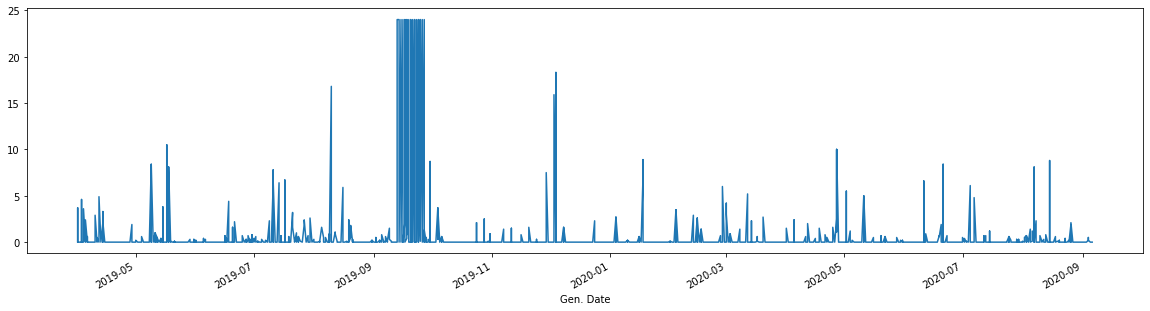

In [ ]:
Gen_data['GF'].plot(figsize = (20,5))
#Dec 2019 is the season where Grid Failure has occur the most

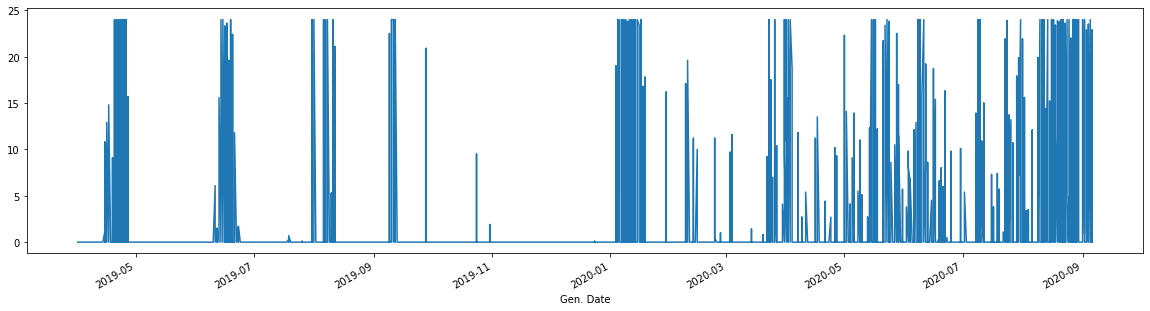

In [ ]:
Gen_data['FM'].plot(figsize = (20,5))
# For the FM type of failure
# In 2019 it occurs periodically after 2 months
# In 2020 it is seen to be more often

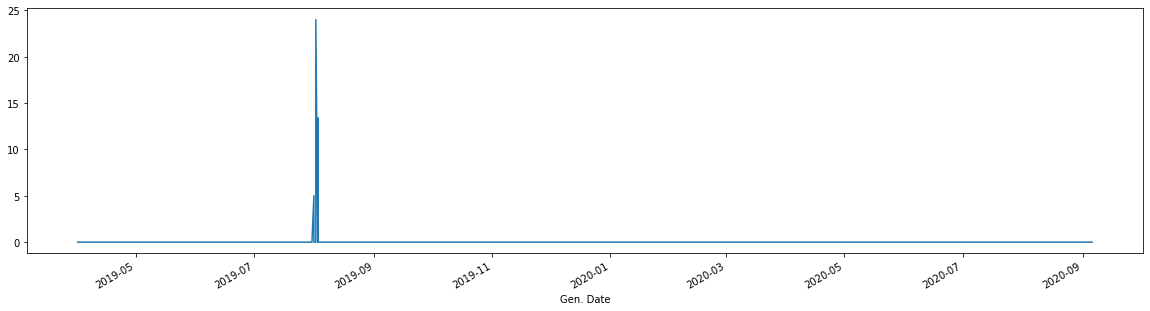

In [ ]:
Gen_data['NOR'].plot(figsize = (20,5))
# NOR type of failure occured only Between July 2019 to September 2019

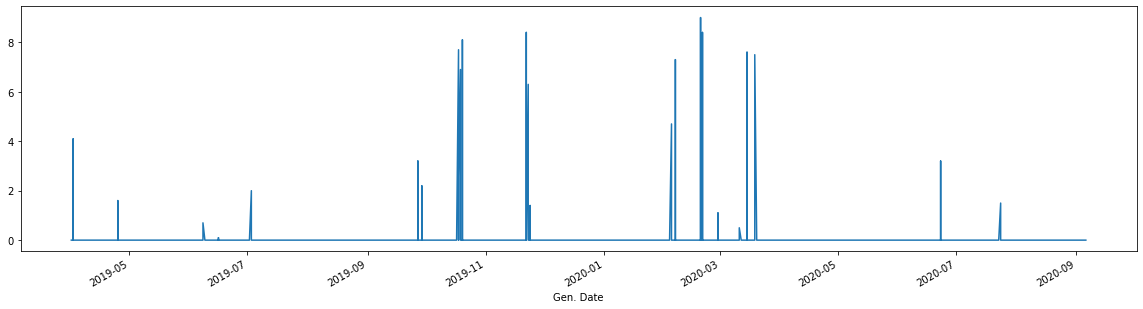

In [ ]:
Gen_data['S'].plot(figsize = (20,5))
# Most failure are seen near Nov 2019

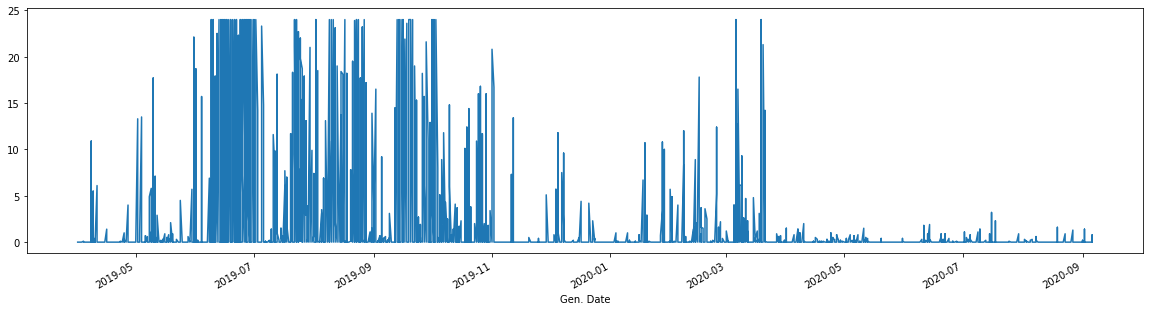

In [ ]:
Gen_data['U'].plot(figsize = (20,5))
#More in the year 2019

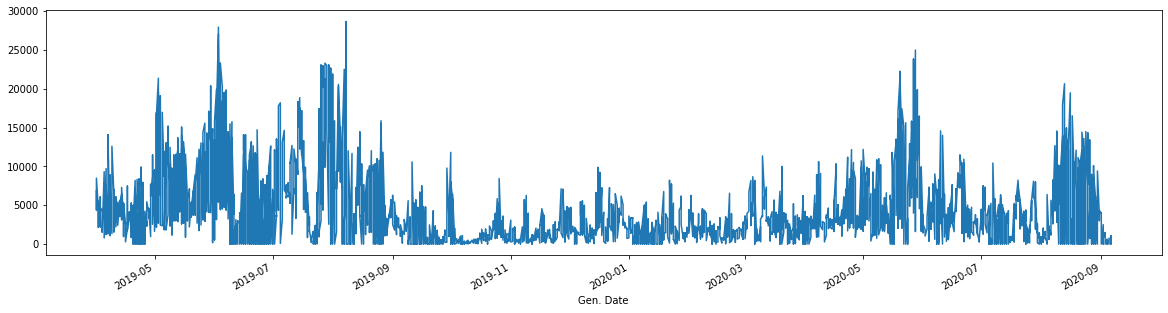

In [ ]:
Gen_data['Gen. (kwh) DAY'].plot(figsize = (20,5))
#Unclear, so we need moving average

In [ ]:
#Calculating moving average
Gen_data_ma = Gen_data.rolling(window=20).mean()

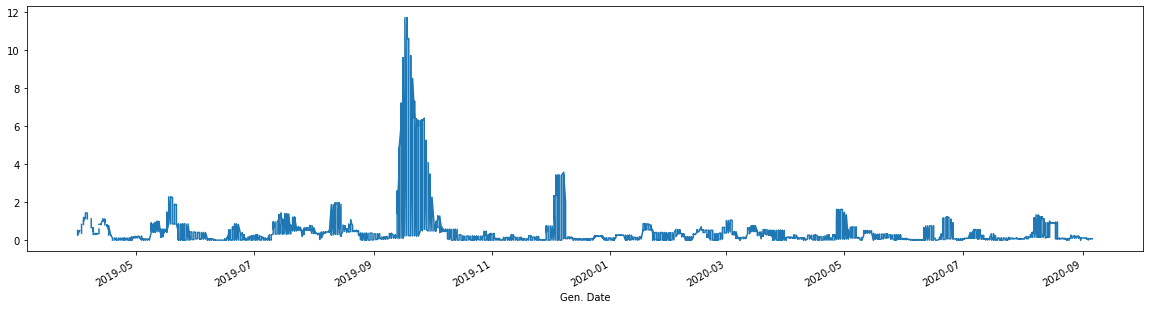

In [ ]:
Gen_data_ma['GF'].plot(figsize = (20,5))

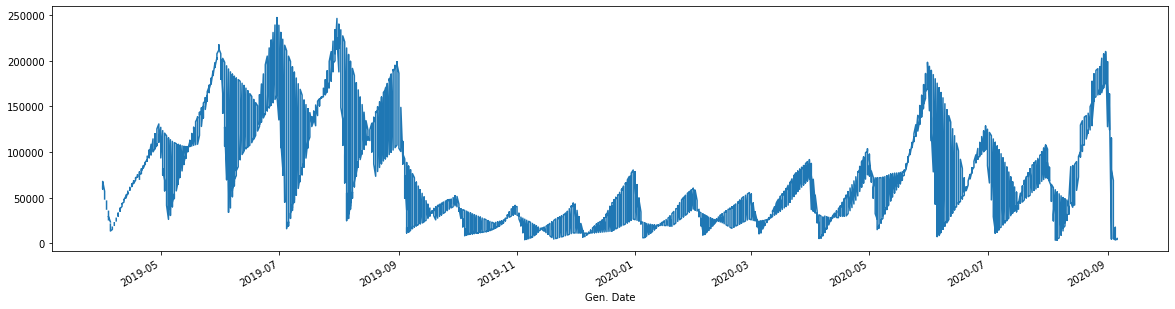

In [ ]:
Gen_data_ma['Gen. (kwh) MTD'].plot(figsize = (20,5))

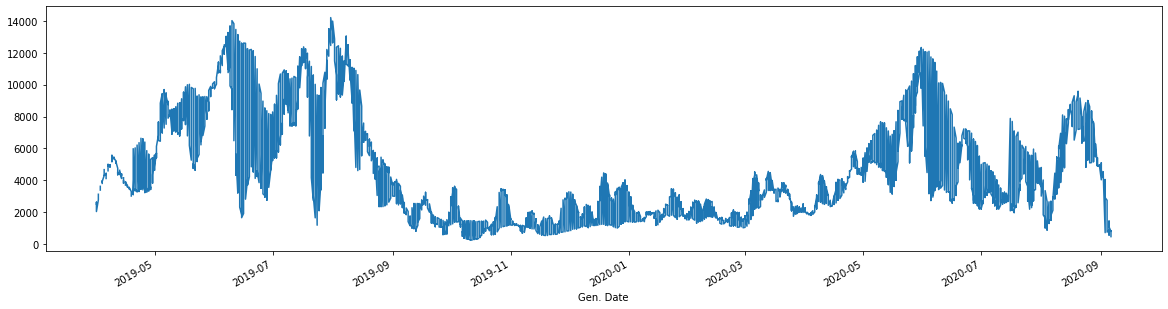

In [ ]:
Gen_data_ma['Gen. (kwh) DAY'].plot(figsize = (20,5))

##TIME SERIES FORECASTING
DETAILS

Forecasting done on GF parameter
From the 2630 data points, 2600 are considered as test data. The last 30 data points were predicted by two methods
1. Baseline
2. ARIMA

In [ ]:
#Droping other columns
Gen_data.drop(['MW','Loc. No.','Gen. (kwh) DAY','Gen. (kwh) MTD','Gen. (kwh) YTD','%PLF DAY','%PLF MTD','%PLF YTD','M/C Avail.%','FM','S','U','NOR','Gen Hrs.','Opr Hrs.'], axis=1, inplace=True)


In [ ]:
Gen_data.head()

,GF
Gen. Date,
2019-04-01,0.0
2019-04-02,0.0
2019-04-03,0.0
2019-04-04,0.0
2019-04-05,0.0


In [ ]:
Gen_Ts = pd.concat([Gen_data,Gen_data.shift(1)],axis=1)

In [ ]:
Gen_Ts.head()

,GF,GF
Gen. Date,,
2019-04-01,0.0,NaN
2019-04-02,0.0,0.0
2019-04-03,0.0,0.0
2019-04-04,0.0,0.0
2019-04-05,0.0,0.0


In [ ]:
#Adding Column Names
Gen_Ts.columns = ['Actual_gen','Forecast_gen']

In [ ]:
Gen_Ts.head()

,Actual_gen,Forecast_gen
Gen. Date,,
2019-04-01,0.0,NaN
2019-04-02,0.0,0.0
2019-04-03,0.0,0.0
2019-04-04,0.0,0.0
2019-04-05,0.0,0.0


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# Removing missing value NaN
Gen_test = Gen_Ts[1:]

In [ ]:
Gen_test.tail()

,Actual_gen,Forecast_gen
Gen. Date,,
2020-09-06,0.0,0.0
2020-09-03,0.0,0.0
2020-09-04,0.2,0.0
2020-09-05,0.0,0.2
2020-09-06,0.0,0.0


In [ ]:
Gen_error = mean_squared_error(Gen_test.Actual_gen,Gen_test.Forecast_gen)

In [ ]:
#Baseline error
Gen_error

8.366686953214149

## ARIMA MODEL

Autoregressive - AR - p

Integrated - I - d

Moving average - MA - q

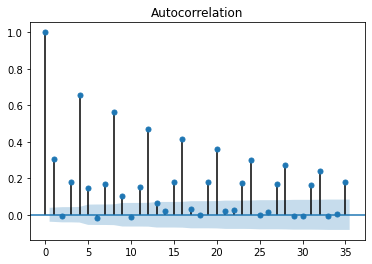

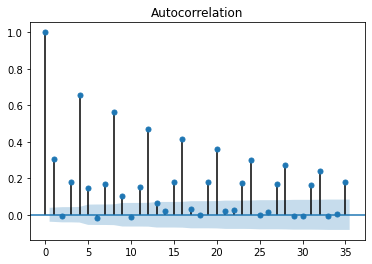

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(Gen_data) # To identify value of q

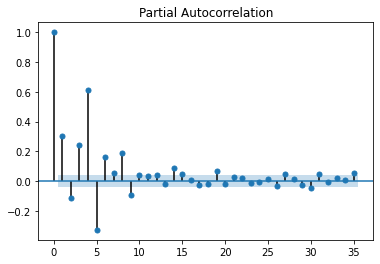

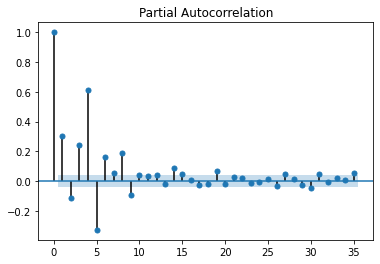

In [ ]:
plot_pacf(Gen_data) #to identify value of p

In [ ]:
# p = 3 q=3 d=1
Gen_data.size

2630

In [ ]:
#Dividing into train and test
gen_train = Gen_data[0:2600]
gen_test = Gen_data[2600:2630]

In [ ]:
gen_train.size

2600

In [ ]:
gen_test.size

30

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
gen_model = ARIMA(gen_train, order = (4,1,4))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
gen_model_fit = gen_model.fit()

In [ ]:
gen_model_fit.aic

9969.883409709159

In [ ]:
gen_forecast = gen_model_fit.forecast(steps=30)[0]

In [ ]:
gen_forecast

array([0.16447939, 0.11580309, 0.36454007, 0.00303512, 0.17088063,
       0.11977055, 0.33121891, 0.01668468, 0.17968012, 0.1248548 ,
       0.30453674, 0.03065292, 0.18626017, 0.12882328, 0.28227436,
       0.04394942, 0.19074058, 0.13185226, 0.2636504 , 0.05637352,
       0.19352895, 0.13421253, 0.24807991, 0.06784534, 0.19499011,
       0.13611324, 0.2350698 , 0.07833865, 0.19542891, 0.13770616])

In [ ]:
gen_test

,GF
Gen. Date,
2020-09-01,0.0
2020-09-01,0.0
2020-09-01,0.0
2020-09-01,0.0
2020-09-02,0.0
2020-09-02,0.0
2020-09-02,0.0
2020-09-02,0.0
2020-09-01,0.0


In [ ]:
# Error by ARIMA
np.sqrt(mean_squared_error(gen_test,gen_forecast))

0.19664659446385638